Missing cells:
 age           488
sex           488
profession      0
income          0
dtype: int64


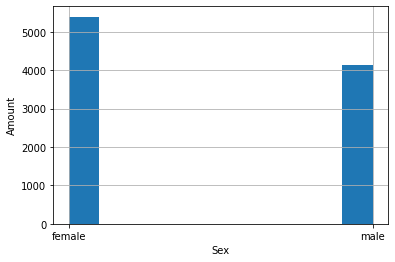

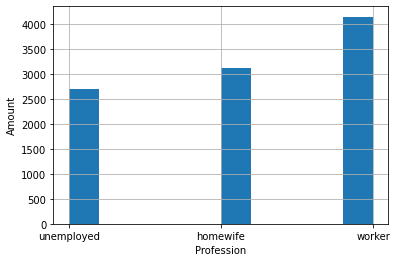

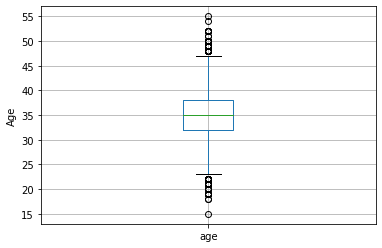

Info about age's column:
 count    9512.000000
mean       34.985071
std         4.987882
min        15.000000
25%        32.000000
50%        35.000000
75%        38.000000
max        55.000000
Name: age, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("classification.csv")
print("Missing cells:\n", df.isnull().sum())
df["sex"].hist()
plt.xlabel("Sex")
plt.ylabel("Amount")
plt.show()
df["profession"].hist()
plt.xlabel("Profession")
plt.ylabel("Amount")
plt.show()
boxplot = df.boxplot(column=["age"])  
boxplot.plot()
plt.ylabel("Age")
plt.show()
print("Info about age's column:\n", df["age"].describe())

Correlation matrix:
                    age       sex  unemployment    worker
age           1.000000  0.028003     -0.000368  0.017522
sex           0.028003  1.000000      0.158898  0.191930
unemployment -0.000368  0.158898      1.000000 -0.653293
worker        0.017522  0.191930     -0.653293  1.000000

Confusion matrix train:
 [[  0   2]
 [  0 114]]

Confusion matrix test:
 [[ 0  2]
 [ 0 49]]

Accuracy score train:
 0.9827586206896551

Accuracy score test:
 0.9607843137254902

F1-score train:
 0.9913043478260869

F1-score test:
 0.98

F1-micro-score train:
 0.9827586206896551

F1-micro-score test:
 0.9607843137254902

Recall score train:
 1.0

Recall score test:
 1.0

Precision score train:
 0.9827586206896551

Precision score test:
 0.9607843137254902


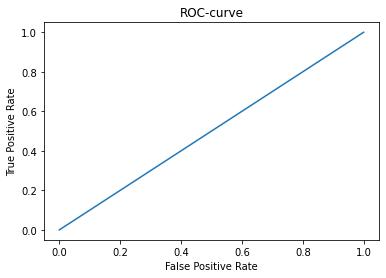

In [7]:
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
df = pd.read_csv("classification.csv")
df = df.drop_duplicates()
df = df.dropna();
df = df.reset_index(drop=True)
encoder = preprocessing.OneHotEncoder(drop = "first")
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sex"]]).toarray())
df = df.join(encoder_df, how = 'left', lsuffix='left', rsuffix='right')
encoder_df = pd.DataFrame(encoder.fit_transform(df[["profession"]]).toarray())
df = df.join(encoder_df, how = 'left', lsuffix='left', rsuffix='right')
encoder_df = pd.DataFrame(encoder.fit_transform(df[["income"]]).toarray())
df = df.join(encoder_df, how = 'left', lsuffix='left', rsuffix='right')
df = df.drop("sex", axis=1)
df = df.drop("profession", axis=1)
df = df.drop("income", axis=1)
df.columns = ["age", "sex", "unemployment", "worker", "income"]
corr_df = df.drop("income", axis=1)
print("Correlation matrix:\n", corr_df.corr())
array = np.array(df)
x = array[:, :4]
y = array[:, 4]
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(x, y, train_size=0.7, shuffle=False)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print("\nConfusion matrix train:\n", confusion_matrix(y_train, y_pred_train))
print("\nConfusion matrix test:\n", confusion_matrix(y_test, y_pred_test))
print("\nAccuracy score train:\n", accuracy_score(y_train, y_pred_train))
print("\nAccuracy score test:\n", accuracy_score(y_test, y_pred_test))
print("\nF1-score train:\n", f1_score(y_train, y_pred_train))
print("\nF1-score test:\n", f1_score(y_test, y_pred_test))
print("\nF1-micro-score train:\n", f1_score(y_train, y_pred_train, average = "micro"))
print("\nF1-micro-score test:\n", f1_score(y_test, y_pred_test, average = "micro"))
print("\nRecall score train:\n", recall_score(y_train, y_pred_train))
print("\nRecall score test:\n", recall_score(y_test, y_pred_test))
print("\nPrecision score train:\n", precision_score(y_train, y_pred_train))
print("\nPrecision score test:\n", precision_score(y_test, y_pred_test))
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
plt.plot (fpr,tpr)
plt.title("ROC-curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 